In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import os
print(os.listdir("C://Users//mbma badie//Desktop//jupyter//Bike_Rents//dataset"))

['Bike-Sharing-Dataset.zip', 'day.csv', 'hour.csv', 'Readme.txt']


In [2]:
bike_rentals = pd.read_csv('dataset/hour.csv')

bike_rentals.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


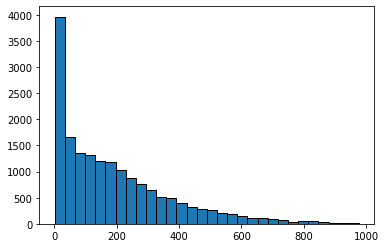

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(bike_rentals['cnt'], edgecolor='black',bins = 30)

plt.show()

In [4]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [5]:
def assign_label(hour):
    if 6 < hour <= 12:
        return 1 # Morning
    if 12 < hour <= 18:
        return 2 # Afternoon
    if 18 < hour <= 24:
        return 3 # Evening
    if 0 <= hour <= 6:
        return 4 # Night
    

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

bike_rentals.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4


In [6]:
train, test = train_test_split(bike_rentals, test_size=0.20)

In [7]:
 bike_rentals.shape, train.shape, test.shape

((17379, 18), (13903, 18), (3476, 18))

In [8]:
column_names = bike_rentals.columns.tolist()

# Removing columns we don't want as features
column_names.remove("cnt")
column_names.remove("registered")
column_names.remove("casual")
column_names.remove("dteday")

features = column_names

features

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[features], train['cnt'])

predictions = lr.predict(test[features])
mse = mean_squared_error(test['cnt'], predictions)

print("The mean squared error using Linear Regression is: ", mse)

The mean squared error using Linear Regression is:  16101.400262077103


In [10]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_mse = {}

for leafs in range(1,15):

    reg = DecisionTreeRegressor(min_samples_leaf=leafs)

    reg.fit(train[features], train['cnt'])

    predictions = reg.predict(test[features])

    mse = mean_squared_error(test['cnt'], predictions)
    
    decision_tree_mse[leafs] = mse

for each in decision_tree_mse:
    print("MSE using", each, "minimum leafs:", decision_tree_mse[each])

MSE using 1 minimum leafs: 3065.377445339471
MSE using 2 minimum leafs: 2875.584284298683
MSE using 3 minimum leafs: 2546.1911523462477
MSE using 4 minimum leafs: 2527.42312678255
MSE using 5 minimum leafs: 2431.2632459258025
MSE using 6 minimum leafs: 2434.926801114707
MSE using 7 minimum leafs: 2428.96517667598
MSE using 8 minimum leafs: 2470.5730555317755
MSE using 9 minimum leafs: 2521.4732664406806
MSE using 10 minimum leafs: 2507.4521579974835
MSE using 11 minimum leafs: 2506.3837088319297
MSE using 12 minimum leafs: 2505.6087163710104
MSE using 13 minimum leafs: 2601.217938557155
MSE using 14 minimum leafs: 2698.125040294116


In [11]:
from sklearn.ensemble import RandomForestRegressor

random_forest_mse = pd.DataFrame()

for leafs in range(1,8):
    
    mse_list = []
    
    for depth in range(10,30):
        
        reg = RandomForestRegressor(min_samples_leaf = leafs, max_depth=depth)
        reg.fit(train[features], train['cnt'])

        predictions = reg.predict(test[features])
        mse = mean_squared_error(test['cnt'], predictions)
        mse_list.append(mse)         

        print("Min leafs:", leafs, ", Depth:", depth, "MSE: ", mse)

    random_forest_mse[leafs] = pd.Series(mse_list)

Min leafs: 1 , Depth: 10 MSE:  2392.595103268798
Min leafs: 1 , Depth: 11 MSE:  2079.3768421268865
Min leafs: 1 , Depth: 12 MSE:  1838.7258696555614
Min leafs: 1 , Depth: 13 MSE:  1700.939177900382
Min leafs: 1 , Depth: 14 MSE:  1597.712865258648
Min leafs: 1 , Depth: 15 MSE:  1570.302941619993
Min leafs: 1 , Depth: 16 MSE:  1563.7709543021172
Min leafs: 1 , Depth: 17 MSE:  1538.9757230292767
Min leafs: 1 , Depth: 18 MSE:  1542.6601735744578
Min leafs: 1 , Depth: 19 MSE:  1518.9136369629723
Min leafs: 1 , Depth: 20 MSE:  1516.77189340965
Min leafs: 1 , Depth: 21 MSE:  1537.3597092094487
Min leafs: 1 , Depth: 22 MSE:  1524.8407893188714
Min leafs: 1 , Depth: 23 MSE:  1526.5420226177282
Min leafs: 1 , Depth: 24 MSE:  1536.6886006881602
Min leafs: 1 , Depth: 25 MSE:  1528.293910024985
Min leafs: 1 , Depth: 26 MSE:  1536.8954782094534
Min leafs: 1 , Depth: 27 MSE:  1515.0948622351057
Min leafs: 1 , Depth: 28 MSE:  1510.2674900730879
Min leafs: 1 , Depth: 29 MSE:  1512.9981934922234
Min lea

In [12]:
random_forest_mse.columns.name = "No. of Min Leafs"

random_forest_mse.index = range(10,30)

random_forest_mse.index.name = "Max Depth"

random_forest_mse

No. of Min Leafs,1,2,3,4,5,6,7
Max Depth,,,,,,,
10,2392.595103,2375.491104,2383.061019,2391.994817,2399.020430,2404.587582,2440.274086
11,2079.376842,2042.913310,2034.957163,2039.224129,2086.607665,2128.294040,2161.171383
12,1838.725870,1821.569051,1831.502535,1869.172872,1904.152715,1950.440871,2010.341652
13,1700.939178,1698.798599,1710.949511,1758.655197,1796.681388,1849.751936,1894.867780
14,1597.712865,1607.139674,1645.653471,1716.298321,1744.044423,1814.369119,1856.753144
15,1570.302942,1578.050802,1611.032968,1661.966527,1723.365317,1790.821513,1840.056149
16,1563.770954,1565.894911,1595.078514,1650.376400,1702.068282,1794.250926,1828.634232
17,1538.975723,1539.696777,1584.216684,1643.036169,1726.793134,1778.262974,1837.712968
18,1542.660174,1564.985009,1578.577086,1648.543064,1723.240281,1773.738267,1832.223028


In [13]:
# The_lowest_MSE:

a, b = random_forest_mse.stack().idxmin()
print(random_forest_mse.loc[[a], [b]])

No. of Min Leafs           1
Max Depth                   
28                1510.26749


In [14]:
predictions[:10]

array([244.96467222,  38.30759611,   8.14167478,  16.94291228,
       305.73832654, 196.65553122,   7.24048947,  20.68869904,
       150.09346196,  18.11751083])

In [15]:
test[:10]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
16106,16107,2012-11-08,4,1,11,20,0,4,1,1,0.38,0.3939,0.29,0.4627,10,235,245,3
5145,5146,2011-08-07,3,0,8,7,0,0,0,1,0.70,0.6667,0.84,0.1940,11,28,39,1
15921,15922,2012-11-01,4,1,11,2,0,4,1,1,0.32,0.3333,0.66,0.1343,10,10,20,4
2523,2524,2011-04-20,2,0,4,1,0,3,1,1,0.42,0.4242,0.94,0.1642,2,5,7,4
12015,12016,2012-05-20,2,1,5,20,0,0,0,1,0.66,0.6212,0.61,0.4179,83,191,274,3
9018,9019,2012-01-16,1,1,1,15,1,1,0,1,0.26,0.2121,0.44,0.4478,17,175,192,2
9530,9531,2012-02-07,1,1,2,1,0,2,1,1,0.28,0.2879,0.61,0.1343,8,6,14,4
10055,10056,2012-02-29,1,1,2,0,0,3,1,1,0.32,0.3333,0.53,0.1045,2,30,32,4
5675,5676,2011-08-29,3,0,8,22,0,1,1,1,0.62,0.6212,0.57,0.1343,23,119,142,3
13293,13294,2012-07-13,3,1,7,2,0,5,1,2,0.66,0.6212,0.61,0.0896,2,15,17,4


In [16]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_true=test['cnt'], y_pred=predictions)

0.9442495724358926